In [1]:
import numpy as np
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
import math

In [2]:
m2v_ffnn_d_1 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_d_word2vec_ffnn_fold1_results.csv')
m2v_ffnn_d_2 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_d_word2vec_ffnn_fold2_results.csv')
m2v_ffnn_d_3 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_d_word2vec_ffnn_fold3_results.csv')
m2v_ffnn_d_4 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_d_word2vec_ffnn_fold4_results.csv')
m2v_ffnn_d_5 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_d_word2vec_ffnn_fold5_results.csv')
m2v_ffnn_d_6 = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_d_word2vec_ffnn_fold6_results.csv')
m2v_ffnn_d = pd.concat((m2v_ffnn_d_1, m2v_ffnn_d_2, m2v_ffnn_d_3, m2v_ffnn_d_4, m2v_ffnn_d_5, m2v_ffnn_d_6), axis=0)
m2v_ffnn_d = m2v_ffnn_d.rename({'3': 'SMILES', '4':'Mol_No', '5': 'actual', '6':'predict'}, axis='columns')

In [3]:
# MAE, AE and RMSE give an idea of the error distribution
print(mean_absolute_error(m2v_ffnn_d['actual'], m2v_ffnn_d['predict']))

#RMSEs
print(math.sqrt(mean_squared_error(m2v_ffnn_d['actual'], m2v_ffnn_d['predict'])))

# R^2 Coefficient of Determination
print(r2_score(m2v_ffnn_d['actual'], m2v_ffnn_d['predict']))

0.890208508095697
1.2470454473547585
0.5172789446281079


In [4]:
len(m2v_ffnn_d)

1183

In [5]:
m2v_ffnn_d['residual']= m2v_ffnn_d['predict']-m2v_ffnn_d['actual']

In [6]:
# calculate standard deviation of the residuals (sdr) - sqrt((sum((residual)**2))/(n-2))
sdr = np.sqrt((m2v_ffnn_d['residual']**2).sum()/(len(m2v_ffnn_d)-2))
sdr

1.2481009240120537

In [7]:
m2v_ffnn_d['std_residual'] = m2v_ffnn_d['residual']/sdr
m2v_ffnn_d['std_residual']

0     -0.003213
1     -0.123942
2     -0.047372
3      1.015631
4      0.953045
         ...   
178    1.329896
179   -0.642852
180   -0.539904
181   -0.455587
182    1.238093
Name: std_residual, Length: 1183, dtype: float64

In [8]:
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']
mol_number = gpHSP_data['number']
mol_name = gpHSP_data['Molecule']

def mapping(number):
#     print(row['number'])
    return gpHSP_data.loc[gpHSP_data['number'] == number]['SMILES'].iloc[0]

m2v_ffnn_d['SMILES'] = m2v_ffnn_d.apply(lambda row: mapping(row['number']), axis=1)

In [9]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 3
m2v_ffnn_d_outliers = m2v_ffnn_d.loc[abs(m2v_ffnn_d['std_residual']) > n]
len(m2v_ffnn_d_outliers)

23

In [10]:
m2v_ffnn_d_outliers

,Unnamed: 0,number,actual,predict,residual,std_residual,SMILES
33,33,457,12.3,16.091581,3.791581,3.037880,FC(F)Cl
109,109,404,20.0,16.103123,-3.896877,-3.122245,NC(=O)NC(N)=O
143,143,966,19.8,15.860110,-3.939890,-3.156708,[O-][O+]=O
192,192,677,15.0,10.855129,-4.144871,-3.320942,C=C
26,26,769,19.9,15.869309,-4.030691,-3.229459,IC(=C)C=C
63,63,1090,18.2,12.633167,-5.566833,-4.460242,O=[S]1CCCC1
94,94,1072,18.2,13.999233,-4.200767,-3.365727,N#CCCC#N
115,115,447,17.3,11.978902,-5.321098,-4.263356,[Cl]
127,127,128,21.0,14.719090,-6.280910,-5.032373,S1C=CSC1=C2SC=CS2
21,21,707,20.0,16.160154,-3.839846,-3.076551,OCCO.O[S](O)=O


In [11]:
# Set the default text font size
plt.rc('font', size=22)

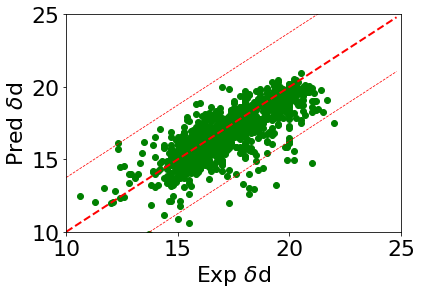

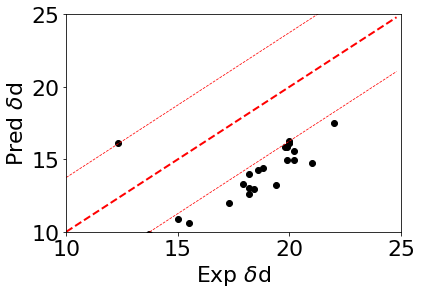

In [12]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_d['actual'], y=m2v_ffnn_d['predict'], color='green')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_d_outliers['actual'], y=m2v_ffnn_d_outliers['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

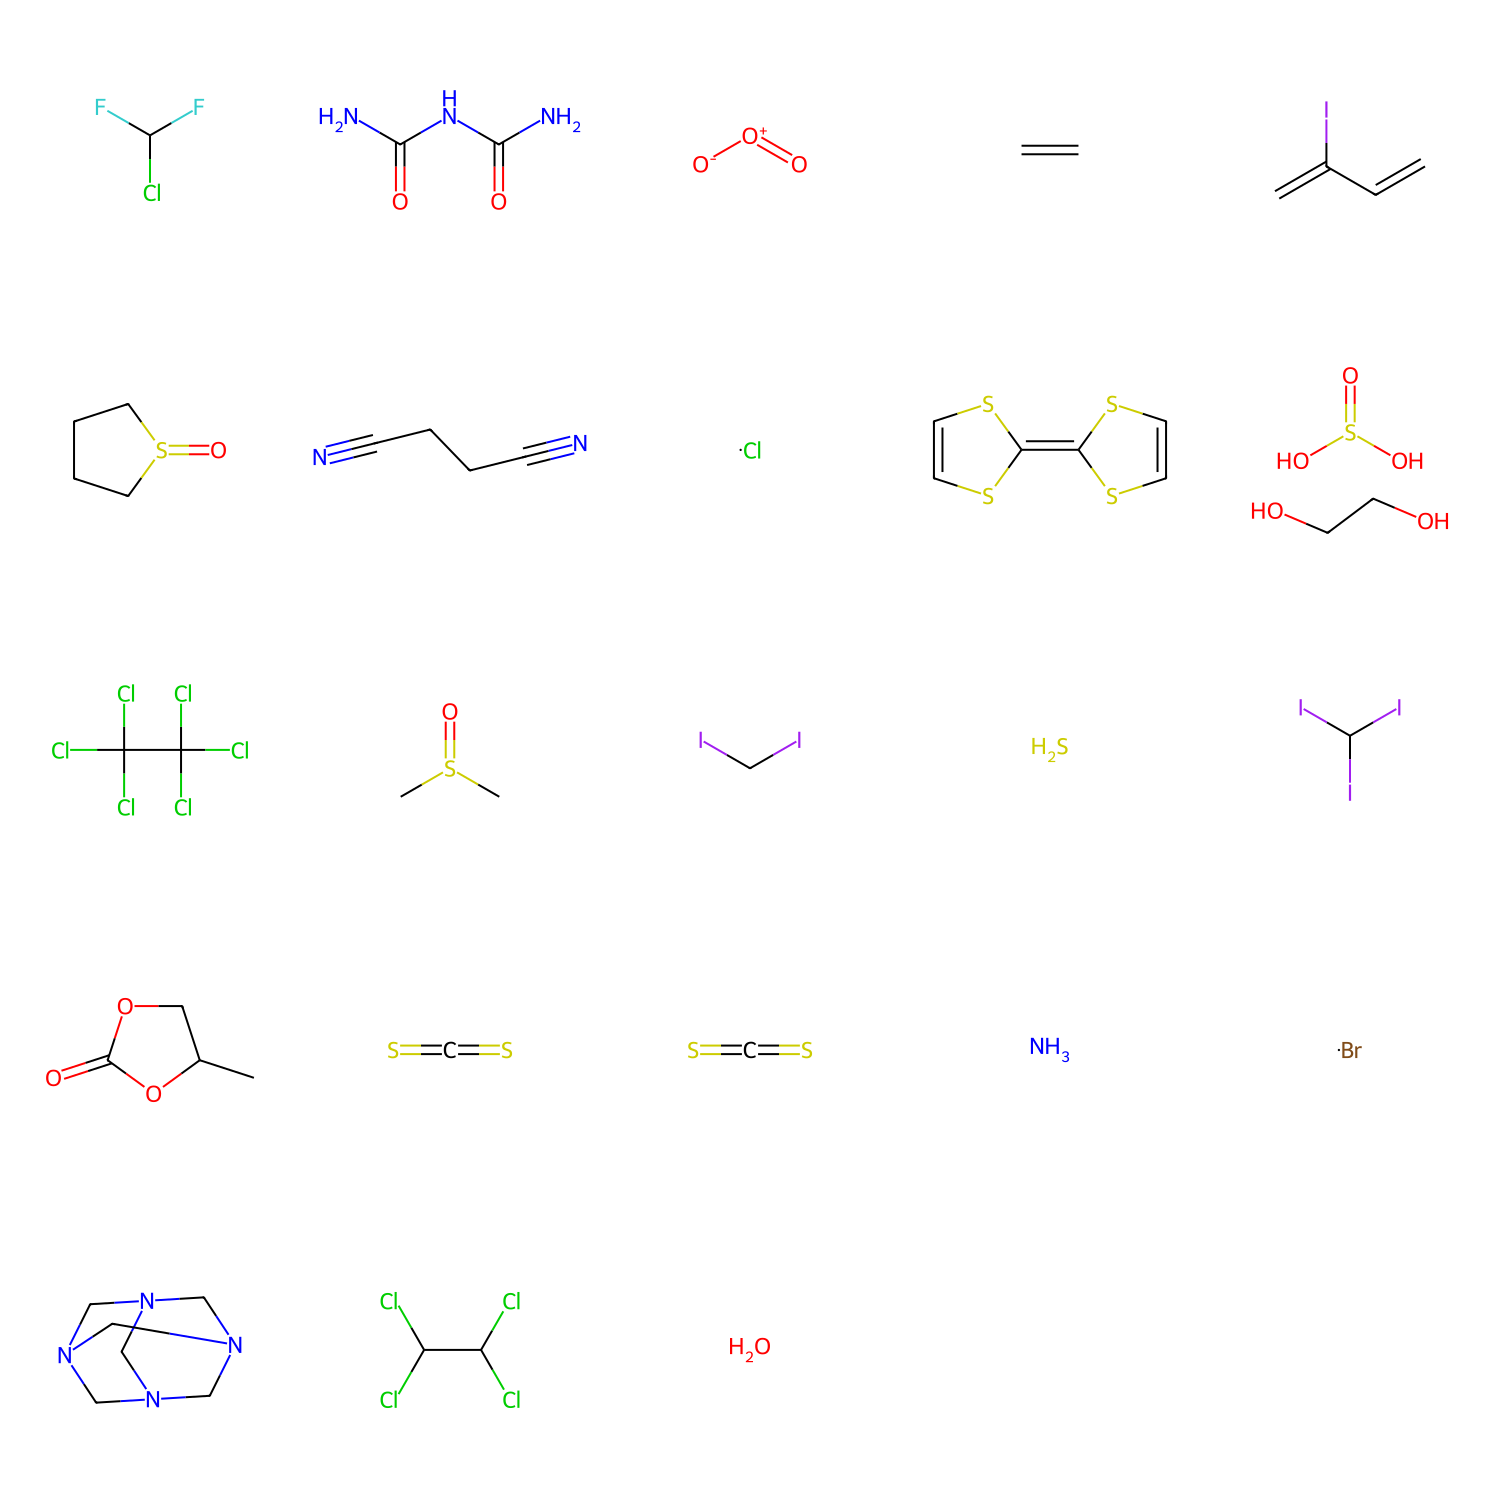

In [13]:
outliners = [Chem.MolFromSmiles(x) for x in m2v_ffnn_d_outliers['SMILES']]
Draw.MolsToGridImage(outliners, subImgSize=(300,300), molsPerRow=5, maxMols=50)

In [14]:
m2v_ffnn_d_outliers.to_csv('m2v_ffnn_d_outliers3.csv')

In [15]:
# n is 2 or 3. Points 2 or 3 sdr away from the prediction line are likely to be outliers
n = 2
m2v_ffnn_d_outliers2 = m2v_ffnn_d.loc[abs(m2v_ffnn_d['std_residual']) > n]
len(m2v_ffnn_d_outliers2)

69

In [16]:
m2v_ffnn_d_outliers2

,Unnamed: 0,number,actual,predict,residual,std_residual,SMILES
17,17,673,15.4,17.897289,2.497289,2.000871,CCSC#N
33,33,457,12.3,16.091581,3.791581,3.037880,FC(F)Cl
44,44,1010,18.4,15.535667,-2.864333,-2.294953,ClP(Cl)Cl
57,57,1082,18.3,15.718667,-2.581333,-2.068209,ClC(Cl)=C(Cl)Cl
80,80,917,19.0,16.162624,-2.837376,-2.273354,C[N+]1([O-])CCOCC1
...,...,...,...,...,...,...,...
130,130,4,18.8,14.390841,-4.409159,-3.532694,ClC(Cl)C(Cl)Cl
152,152,1180,15.5,10.574849,-4.925151,-3.946116,O
154,154,719,21.3,18.499544,-2.800456,-2.243774,C1c2ccccc2c3ccccc13
158,158,137,18.0,15.152668,-2.847332,-2.281332,CC1OC(=O)OC1C


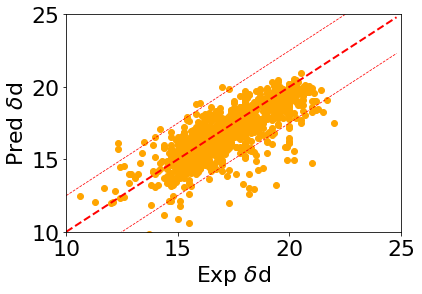

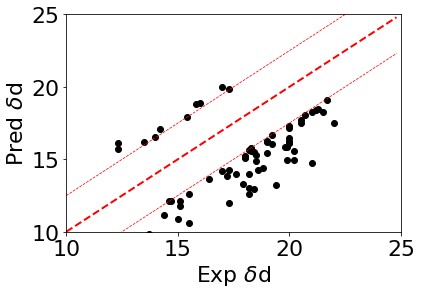

In [17]:
plt.figure(2)

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_d['actual'], y=m2v_ffnn_d['predict'], color='orange')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])

plt.show()

ln = np.arange(10, 25, 0.2)
plt.plot(ln, ln,'r--', linewidth = '2')
plt.plot(ln, ln+n*sdr,'r--', linewidth = '0.75')
plt.plot(ln, ln-n*sdr,'r--', linewidth = '0.75')
plt.scatter(x=m2v_ffnn_d_outliers2['actual'], y=m2v_ffnn_d_outliers2['predict'], color='black')
plt.xlabel('Exp $\delta$d')
plt.ylabel('Pred $\delta$d')
plt.xlim([10,25])
plt.ylim([10,25])
plt.show()

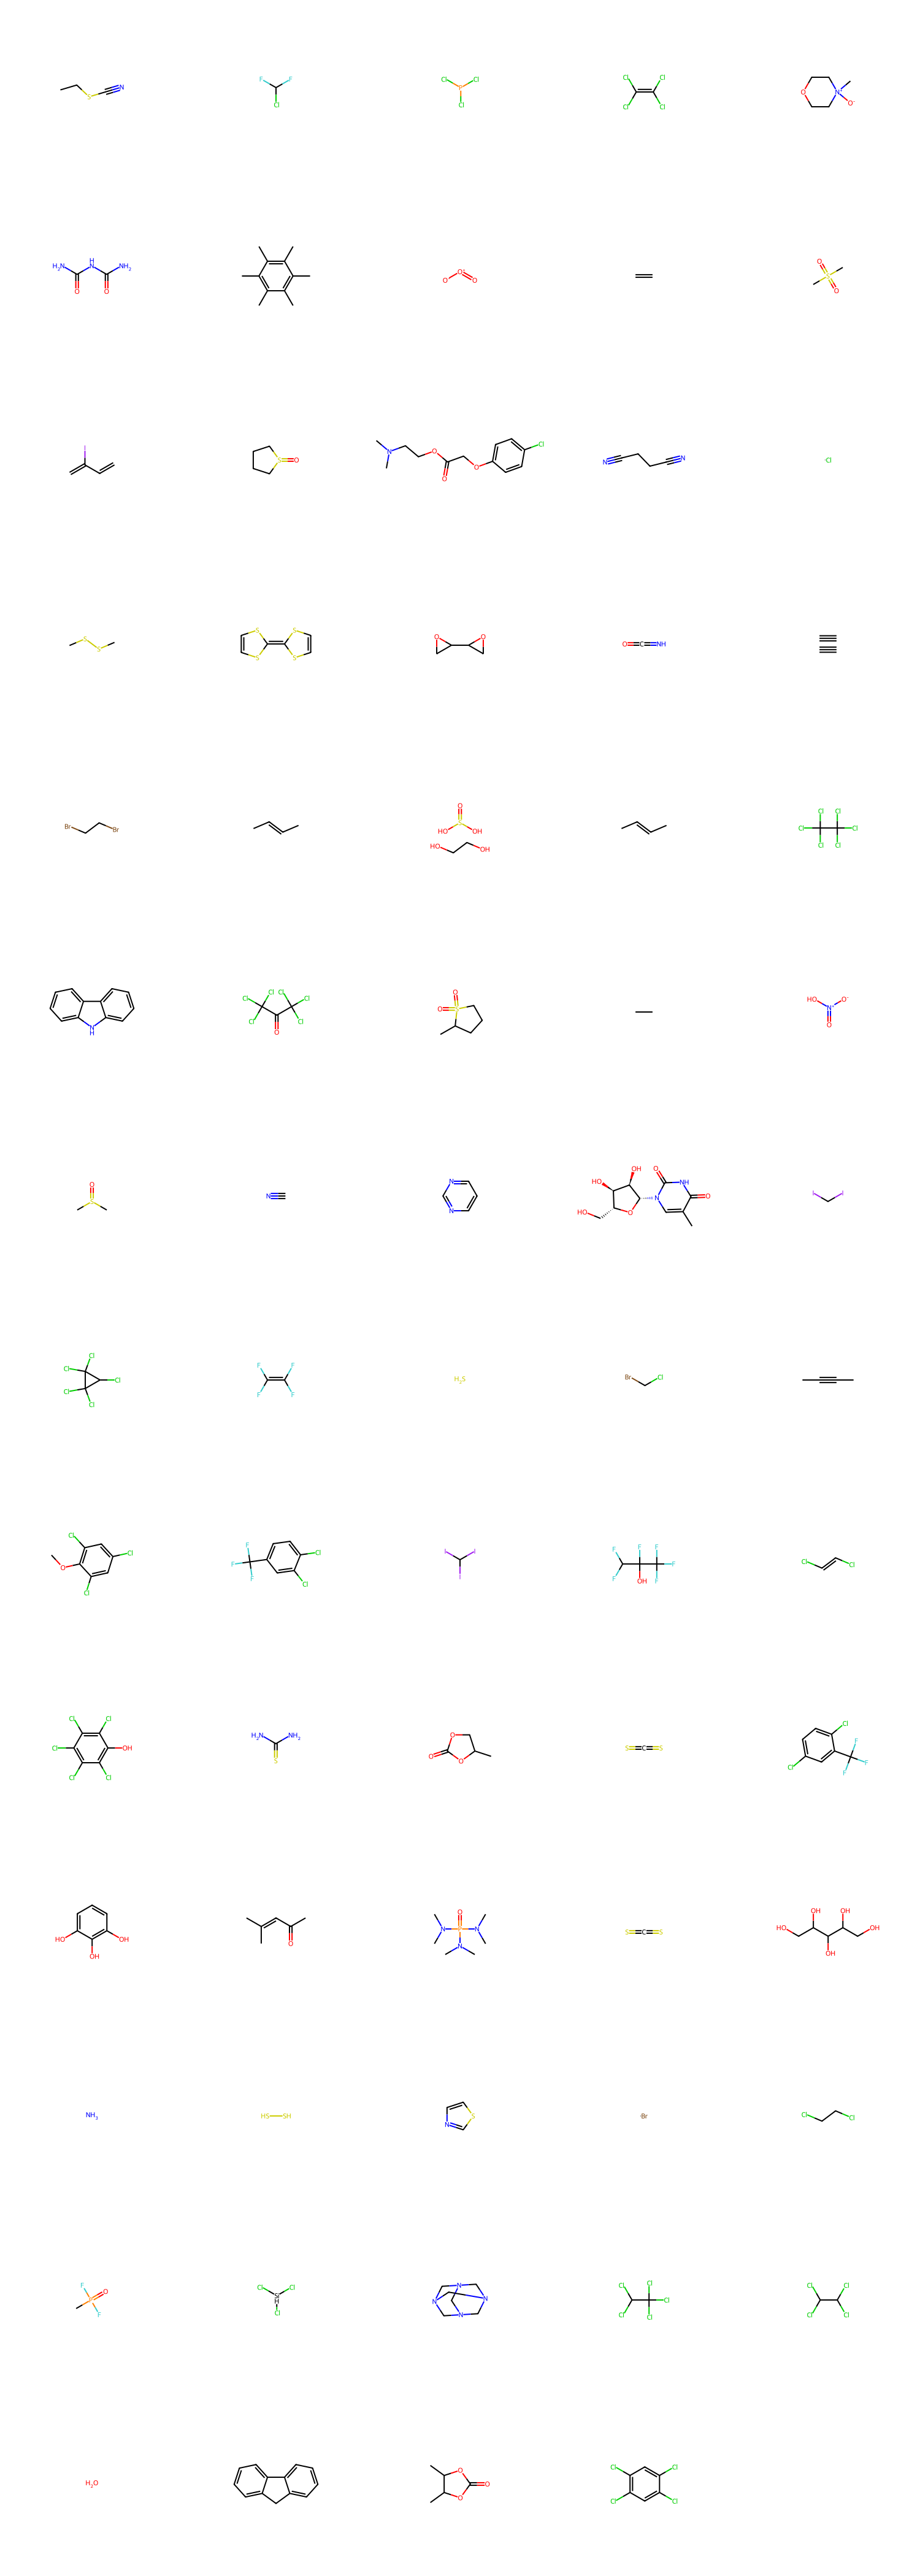

In [18]:
outliners2 = [Chem.MolFromSmiles(x) for x in m2v_ffnn_d_outliers2['SMILES']]
Draw.MolsToGridImage(outliners2, subImgSize=(300,300), molsPerRow=5, maxMols=100)

In [19]:
m2v_ffnn_d_outliers2.to_csv('m2v_ffnn_d_outliers2.csv')

In [20]:
from rdkit.Chem import Descriptors
gpHSP_data = pd.read_csv('/Users/jiayun/Documents/work/mol2vec/hansen_1k_smiles_shorter.csv')
mol_smiles = gpHSP_data['SMILES']

# calculate molecular weight of the full dataset
molwt = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in gpHSP_data['SMILES']]
np_molwt = np.asarray(molwt)

# calculate molecular weight of outliers
molwt_outliers2 = [(Descriptors.ExactMolWt(Chem.MolFromSmiles(x))) for x in m2v_ffnn_d_outliers2['SMILES']]
np_molwt_outliers2 = np.asarray(molwt_outliers2)

# Compare average molecular weight for full data and outliers
print(np.average(np_molwt))
print(np.average(np_molwt_outliers2))

131.2953603288794
127.15701560034783


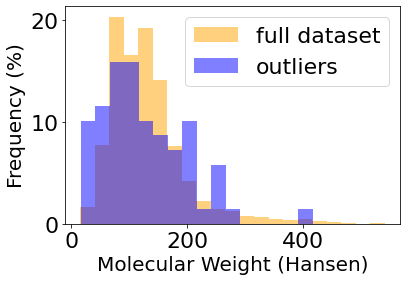

In [21]:
bin_width = 25
df = pd.DataFrame(np_molwt, columns = ["full dataset"])
df2 = pd.DataFrame(np_molwt_outliers2, columns = ["outliers"])
ax = df.plot.hist(bins=(np.arange(min(molwt), max(molwt)+bin_width, bin_width)), alpha=0.5, color='orange', weights=np.ones_like(df.index) *100/ len(df))
df2.plot(kind='hist', bins=(np.arange(min(molwt_outliers2), max(molwt_outliers2)+bin_width, bin_width)), alpha=0.5, color='blue', weights=np.ones_like(df2.index) *100 /len(df2), ax=ax)
ax.set_xlabel("Molecular Weight (Hansen)", size=20)
ax.set_ylabel("Frequency (%)", size=20)
plt.show()